In this part our goal is to reach the goal state G from the starting state S without visiting the hole states H. That is, while trying to reach the goal state G from the starting state S, if the agent visits the hole states H,then it will fall into the hole and die as Figure shows:

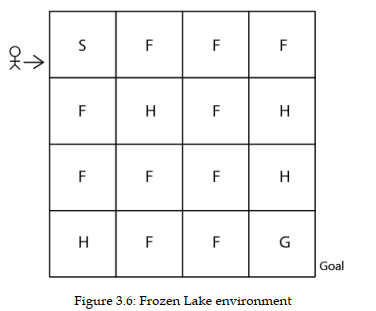

• S implies the starting state

• F implies the frozen states

• H implies the hole states

• G implies the goal state

## Solving the problem with value iteration
In the previous part, we learned about the Frozen Lake environment. we want the agent to avoid the hole states H to reach the goal state G.
How can we achieve this goal? That is, how can we reach state G from S without 
visiting H? We learned that the optimal policy tells the agent to perform the correct 
action in each state. So, if we find the optimal policy, then we can reach state G 
from S without visiting state H. Okay, how can we find the optimal policy? We 
can use the value iteration method we just learned to find the optimal policy.

Remember that all our states (S to G) will be encoded from 0 to 16 and all four 
actions—left, down, up, right—will be encoded from 0 to 3 in the Gym toolkit.

In [4]:
# First, let's import the necessary libraries:
import gym
import numpy as np

# Now, let's create the Frozen Lake environment using Gym:
env = gym.make("FrozenLake-v1", render_mode="ansi")
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG



The preceding code will display

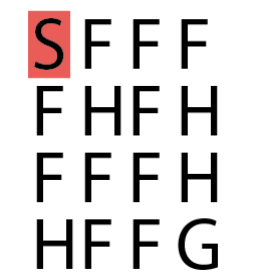

let's learn how to compute the optimal policy using the value 
iteration method.

In the value iteration method, we perform two steps:
1. Compute the optimal value function by taking the maximum over the Q 
function, that is

     


2. Extract the optimal policy from the computed optimal value function


## Computing the optimal value function
We will develop a function named `value_iteration` to iteratively compute the optimal value function by maximizing the Q function.

In [5]:

def value_iteration(env,num_iterations,threshold,gamma):
    # Initialize the value table with zeros
    value_table = np.zeros(env.observation_space.n)
    
    for i in range(num_iterations):
        # Copy the value table to check for convergence
        updated_value_table = np.copy(value_table)
        
        # Iterate over all states
        for state in range(env.observation_space.n):
            Q_values = []
            # Iterate over all possible actions
            for action in range(env.action_space.n):
                next_state_rewards = []
                # Iterate over all possible next states and their probabilities
                for prob, next_state, reward, done in env.P[state][action]:
                    next_state_rewards.append(prob * (reward + gamma * updated_value_table[next_state]))
                # Sum the expected rewards for this action
                Q_values.append(np.sum(next_state_rewards))
            
            # Update the value of the current state
            value_table[state] = max(Q_values)
        
        # Check for convergence
        if np.sum(np.fabs(updated_value_table - value_table)) <= threshold:
            print(f'Value iteration converged at iteration {i+1}.')
            break
    
    return value_table , i+1

In [3]:
num_iterations = [1,10,50,100,500,1000,5000,10000]
thresholds = [1e-1,1e-5,1e-10,1e-15,1e-20]
gammas=[0.1,0.5,0.9,0.99,1]
value_tables = []
num_converged=[]
for num in num_iterations:
    for threshold in thresholds:
        for gamma in gammas:
            value_table,num_iteration = value_iteration(env, num, threshold, gamma)
            value_tables.append(value_table)
            num_converged.append(num_iteration)
            #print(f'Value table for num_iterations={num}, threshold={threshold}, gamma={gamma}:')


Value iteration converged at iteration 2.
Value iteration converged at iteration 3.
Value iteration converged at iteration 8.
Value iteration converged at iteration 6.
Value iteration converged at iteration 2.
Value iteration converged at iteration 3.
Value iteration converged at iteration 8.
Value iteration converged at iteration 20.
Value iteration converged at iteration 26.
Value iteration converged at iteration 6.
Value iteration converged at iteration 15.
Value iteration converged at iteration 11.
Value iteration converged at iteration 31.
Value iteration converged at iteration 16.
Value iteration converged at iteration 46.
Value iteration converged at iteration 20.
Value iteration converged at iteration 2.
Value iteration converged at iteration 3.
Value iteration converged at iteration 8.
Value iteration converged at iteration 20.
Value iteration converged at iteration 26.
Value iteration converged at iteration 6.
Value iteration converged at iteration 15.
Value iteration converg

In [29]:
import pandas as pd
import itertools
test_tuples = list(itertools.product(num_iterations,thresholds,gammas))
value_tables_df=pd.DataFrame(test_tuples,columns=['num_iteration','threshold','gamma'])
value_tables_df['N_steps_converged']=num_converged
value_tables_df['value_table']=value_tables
value_tables_df.drop('value_table',axis=1)
# import seaborn as sns
# sns.heatmap(value_tables[189].reshape(4,4))


,num_iteration,threshold,gamma,N_steps_converged
0,1,1.000000e-01,0.10,1
1,1,1.000000e-01,0.50,1
2,1,1.000000e-01,0.90,1
3,1,1.000000e-01,0.99,1
4,1,1.000000e-01,1.00,1
...,...,...,...,...
195,10000,1.000000e-20,0.10,20
196,10000,1.000000e-20,0.50,57
197,10000,1.000000e-20,0.90,267
198,10000,1.000000e-20,0.99,996


In [ ]:
import numpy as np

def unique_arrays_with_indices(list_of_arrays):
    seen = {}
    unique_arrays = []
    indices_per_unique_array = []
    
    for index, array in enumerate(list_of_arrays):
        array_tuple = tuple(array)
        if array_tuple not in seen:
            seen[array_tuple] = len(unique_arrays)
            unique_arrays.append(array)
            indices_per_unique_array.append([index])
        else:
            unique_index = seen[array_tuple]
            indices_per_unique_array[unique_index].append(index)
    
    return unique_arrays, indices_per_unique_array


In [15]:
unique_value_tables, indices_unique_policies= unique_arrays_with_indices(value_tables_df['value_table'])
len(unique_value_tables)

41

/tmp/ipykernel_5611/2508413414.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to make space for the colorbar


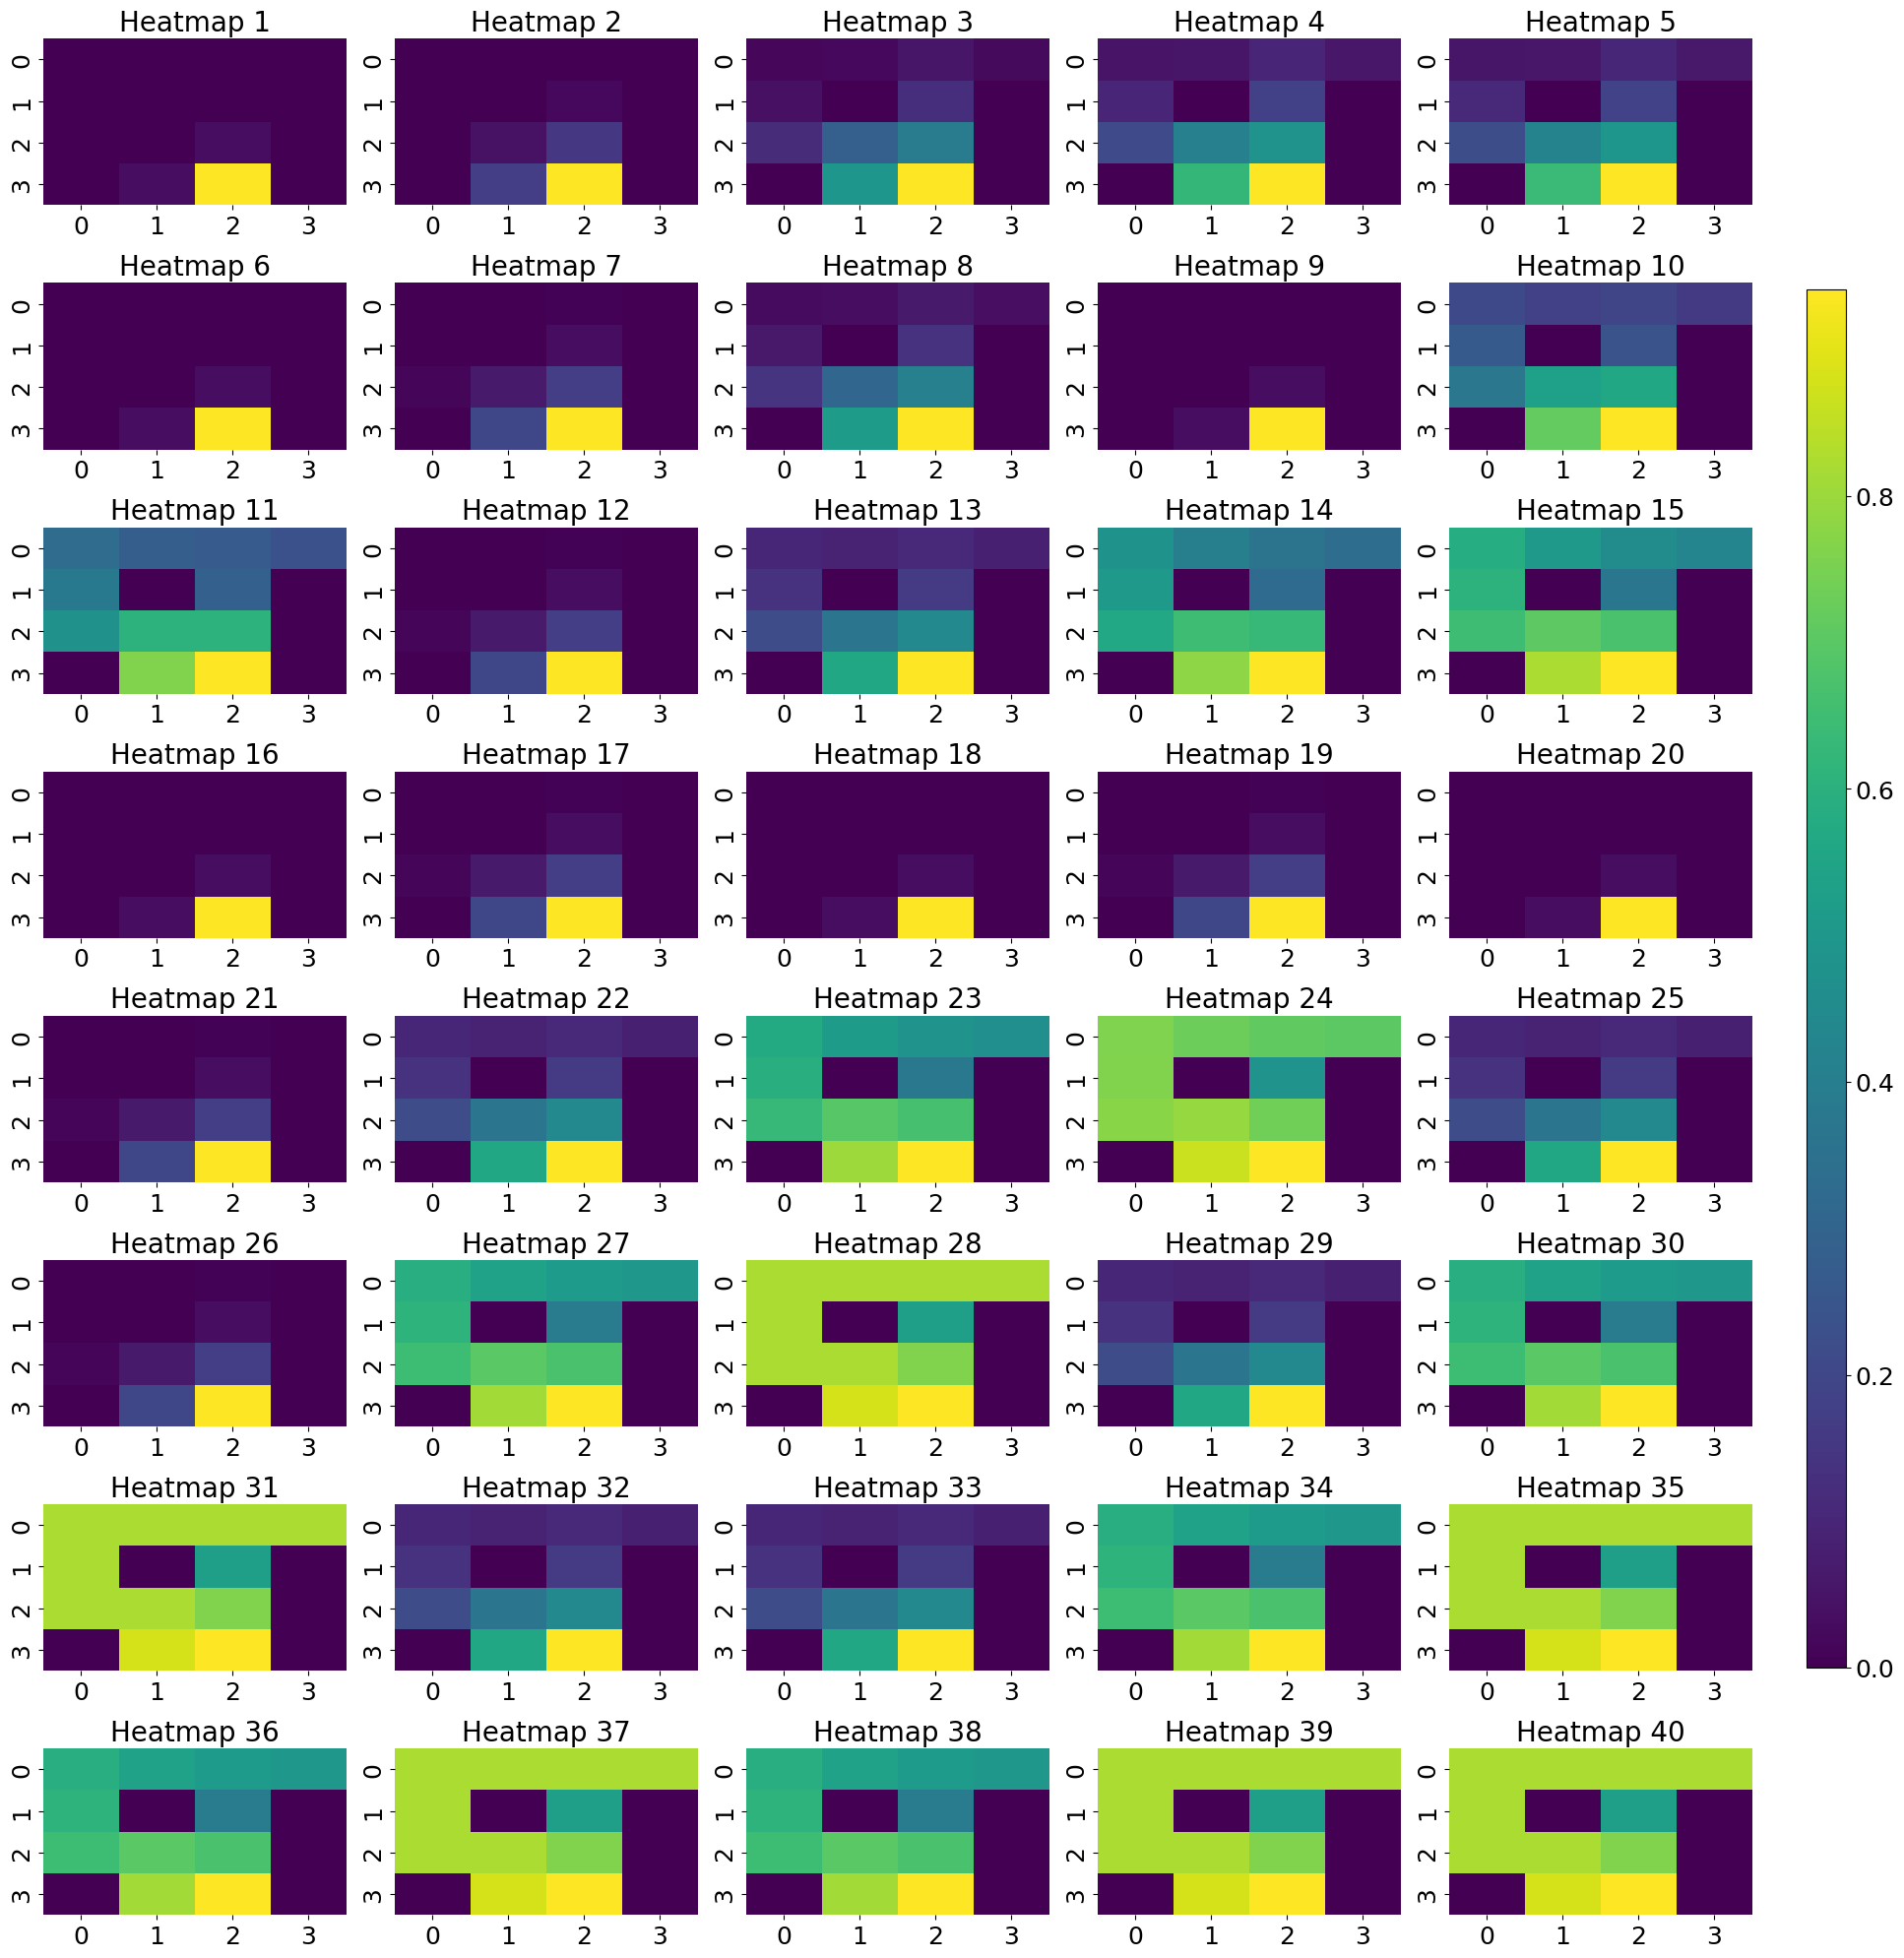

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Number of subplots (2x2 grid in this case)
nrows = 8
ncols = 5

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

# Flatten axes array for easy iteration
axes = axes.flatten()
vmin = min(value_table.min() for value_table in unique_value_tables[1:])
vmax = max(value_table.max() for value_table in unique_value_tables[1:])
# Plot each heatmap in its own subplot
for i, ax in enumerate(axes):
    sns.heatmap(unique_value_tables[i+1].reshape(4,4), ax=ax, cmap='viridis', cbar=False)
    ax.set_title(f'Heatmap {i+1}')
    ax.set_title(f'Heatmap {i+1}', fontsize=20)  # Set title font size
    ax.tick_params(axis='both', which='major', labelsize=18) 

# Create a colorbar axis on the right side of the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar_ax.tick_params(labelsize=18) 
# Create a single colorbar for all heatmaps
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the layout to make space for the colorbar


# Display plot
plt.show()

## Extracting the optimal policy from the optimal value function

In the previous step, we computed the optimal value function. Now, we will extract the optimal policy from the computed optimal value function.

we define a function called extract_policy, which takes value_table as a 
parameter:

In [7]:
def extract_policy(value_table):
    policy = np.zeros(env.observation_space.n)
    
    for state in range(env.observation_space.n):
        Q_values = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for prob, next_state, reward, done in env.P[state][action]:
                Q_values[action] += prob * (reward + gamma * value_table[next_state])
        policy[state] = np.argmax(Q_values)
    
    return policy


## Putting it all together

We learned that in the Frozen Lake environment, our goal is to find the optimal 
policy that selects the correct action in each state so that we can reach state G from 
state A without visiting the hole states.
First, we compute the optimal value function using our value_iteration function by 
passing our Frozen Lake environment as the parameter:

Next, we extract the optimal policy from the optimal value function using our 
extract_policy function:

In [34]:
Optimal_Policies = []
for value_table in value_tables:
    Optimal_Policy = extract_policy(value_table)
    Optimal_Policies.append(Optimal_Policy)
value_tables_df['Optimal_Policy']=Optimal_Policies

In [35]:
import concurrent.futures
import time
def visualize_policy(env, policy):
    state = env.reset()[0]  # Reset environment and get initial state
    #env.render()
    #time.sleep(1)
    Reward = []
    done = False
    for step in range(1000):
        action = int(policy[state])  # Get the action from the policy
        result = env.step(action)  # Take the action
        state = result[0]
        reward = result[1]
        Reward.append(reward)
        done = result[2]
        info = result[3]
        if done:
            break
    return Reward

def test_policy(env, policy, n_tests=10):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(visualize_policy, env, policy) for _ in range(n_tests)]
        rewards = [future.result() for future in concurrent.futures.as_completed(futures)]
    return rewards

list_N_steps_to_done = []
list_Reward = []
unique_policies, indices_unique_policies= unique_arrays_with_indices(value_tables_df['Optimal_Policy'])
print("Unique arrays:", unique_policies)
print("Indices of unique arrays:", indices_unique_policies)
Optimal_Policies_df=pd.DataFrame(columns=value_tables_df.columns)
for policy in unique_policies:
    rewards = test_policy(env, policy, n_tests=1000)
    steps_to_done = [len(reward) for reward in rewards]
    total_rewards = [sum(reward) for reward in rewards]

    list_N_steps_to_done.append(sum(steps_to_done) / len(steps_to_done))  # Average steps to done
    list_Reward.append(sum(total_rewards) / len(total_rewards))  # Average reward

Optimal_Policies_df['N_steps_to_done'] = list_N_steps_to_done
Optimal_Policies_df['Optimal_Policy'] = unique_policies
Optimal_Policies_df['Reward'] = list_Reward

Unique arrays: [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 2., 1., 0.]), array([1., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([2., 3., 2., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([0., 3., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]), array([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])]
Indices of unique arrays: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [25, 50, 75, 100, 125, 150, 175], [26, 51, 76, 101, 126, 151, 176], [27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 47, 48, 49, 52, 55, 56, 60, 61, 65, 66, 70, 71, 77, 80, 81, 85, 86, 90, 91, 95, 96, 102, 105, 106, 110, 111, 115, 116, 120, 121, 127, 130, 131, 135, 136, 140, 141, 145, 146, 152, 155, 156, 160, 161, 165, 166, 170, 171, 17

/home/ajf/Share/PhD_Mechatronics/semester_2/ML_Applied/HomeWork/Applied_ML_Course/ML-HW02/.venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [36]:
list_mean_num_iteration=[]
list_mean_threshold=[]
list_mean_gamma=[]
for indices in indices_unique_policies:
    list_mean_num_iteration.append(np.mean(value_tables_df['num_iteration'].values[indices]))
    list_mean_threshold.append(np.mean(value_tables_df['threshold'].values[indices]))
    list_mean_gamma.append(np.mean(value_tables_df['gamma'].values[indices]))

Optimal_Policies_df['num_iteration']=list_mean_num_iteration
Optimal_Policies_df['threshold']=list_mean_threshold
Optimal_Policies_df['gamma']=list_mean_gamma

In [38]:
Optimal_Policies_df.drop(['Optimal_Policy','value_table','N_steps_converged'],axis=1)

,num_iteration,threshold,gamma,N_steps_to_done,Reward
0,1.000000,0.020002,0.698000,18.177,0.000
1,2380.000000,0.100000,0.100000,18.292,0.000
2,2380.000000,0.100000,0.500000,15.176,0.208
3,2055.342466,0.012331,0.474658,28.560,0.480
4,10.000000,0.000003,0.500000,27.703,0.467
5,2775.000000,0.033335,0.931667,43.416,0.763
6,2775.000000,0.000003,0.995000,48.197,0.816
